# SNLP Assignment 2

Name 1: Sangeet Sagar<br/>
Student id 1: 7009050<br/>
Email 1: sasa00001@stud.uni-saarland.de<br/>


Name 2: Nikhil Paliwal<br/>
Student id 2: 7009915<br/>
Email 2: nipa00002@stud.uni-saarland.de<br/> 

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook and the respective Python files for exercises 2 and 3. There is no need to submit the data files. <br/>
Upload the zipped folder in Teams. Make sure to click on "Turn-in" after you upload your submission, otherwise the assignment will not be considered as submitted. Only one member of the group should make the submisssion.

---


## Exercise 1 (1.5 + 1.5 = 3 points)

The perplexity of a model can also be defined as $2^{-\frac{1}{n} \sum^n_1 \log p(w_i|w_{i-1})}$. For the following exercise, use the log probabilities given this pretrained bigram language model. Tokenization is apparent from the tokens in the following table.

|A|B|log p(B\|A)|
|-|-|-|
|`The`|`man`|-1.8|
|`the`|`man`|-2.2|
|`the`|`post`|-2.7|
|`Man`|`the`|-5.1|
|`man`|`the`|-3.7|
|`man`|`shouted`|-2.9|
|`shouted`|`"`|-3.1|
|`post`|`!`|-3.1|
|`"`|`Man`|-1.9|
|`"`|`man`|-1.7|
|`!`|`"`|-1.2|
|`"`|`The`|-0.9|
|`"`|`the`|-1.2|

Assume probabilities not listed are $0^+$ (and the respective logarithm $-\infty$). For counting bigrams, consider your corpus as a circular structure i.e. include the bigram $(w_N, w_1)$ in your final counts. Therefore the weight of each bigram is $\frac{1}{|\text{words}|}$.

### 1.1 Lowercasing Input (1.5 points)

Compute the perplexity of the following two sentences (and show the steps).

```
The man shouted "Man the post!"
the man shouted "man the post!"
```

Is lowercasing the input always a good idea? What are the advantages and disadvantages?

### 1.2 Unknown Tokens (1.5 points)

Compute the perplexity of the following two sentences.

```
The man shouted "Man the stations!"
The man shouted "Man the the!"
```

Elaborate on the computed results. 2. Do you consider both sentences to be equally probable?

### Answers:
***Note: All $\log$ are in base 2*** 
#### 1.1 Lowercasing Input
```
The man shouted "Man the post!"
```
tokens = ['The', 'man', 'shouted', '"', 'Man', 'the', 'post', '!', '"']
$$
\log pp = -\frac{1}{9}(\log p(\text{man}|\text{The}) + \log p(\text{shouted}|\text{man}) + \log p(\text{"}|\text{shouted}) + \log p(\text{Man}|\text{"}) + \log p(\text{the}|\text{Man}) + \log p(\text{post}|\text{the}) + \log p(\text{!}|\text{post}) + \log p(\text{"}|\text{!}) + \log p(\text{The}|\text{''}) )
$$
$$\log pp = -\frac{1}{9}((-1.8)  + (-2.9)  + (-3.1)  + (-1.9)  + (-5.1)  + (-2.7)  + (-3.1)  + (-1.2)  + (-0.9 ))$$
$$\log pp = 2.522222222 $$
$$ pp = 2^{2.522222222} = 5.744662 $$
```
The man shouted "Man the post!"
```
tokens = ['the', 'man', 'shouted', '"', 'man', 'the', 'post', '!', '"']
$$
\log pp = -\frac{1}{9}(\log p(\text{man}|\text{the}) + \log p(\text{shouted}|\text{man}) + \log p(\text{"}|\text{shouted}) + \log p(\text{man}|\text{"}) + \log p(\text{the}|\text{man}) + \log p(\text{post}|\text{the}) + \log p(\text{!}|\text{post}) + \log p(\text{"}|\text{!}) + \log p(\text{the}|\text{"}))
$$
$$\log pp = -\frac{1}{9}((-2.2) + (-2.9) + (-3.1) + (-1.7) + (-3.7) + (-2.7) + (-3.1) + (-1.2) + (-1.2)) $$
$$\log pp = 2.42222222 $$
$$ pp = 2^{2.42222222} = 5.359959 $$

Lowercasing is not always a good choice (Why? Discussed in *Disadvantages*). But, in the above sentences lowercasing helps achieve a lower perplexity score, hence a more preferred pre-processing technique.

*Advantages* <br>
- A lower perplexity indicates a better model, hence ***lowercasing*** the input is (not always) a good idea.
- It will reduce the number of tokens, also reducing computation and memory cost. The second sentence with lowercase words has less perplexity too (thus, less word error rate in a LM).
- Helps to maintain the consistency flow for many NLP tasks like ASR.

*Disadvantages* <br>
- Lowercasing languages like German is not always a good choice. It is a case dependent languages and lowercasing would change the semantic meaning or produce wrong sentence in terms of grammar.
- Lowercasing proper nouns (names of person, place etc.) in English is not a suitable choice. For example (in case of ASR): if all proper nouns are lowercased then the language model trained on this corpus would generate text in lowercase for nouns like `eurosai`, while a preferred output would have been `EUROSAI` 

#### 1.2 Unknown Tokens 
```
The man shouted "Man the stations!"
```
tokens = ['The', 'man', 'shouted', '"', 'Man', 'the', 'stations', '!', '"']
$$
\log pp = -\frac{1}{9}(\log p(\text{man}|\text{The}) + \log p(\text{shouted}|\text{man}) + \log p(\text{"}|\text{shouted}) + \log p(\text{Man}|\text{"}) + \log p(\text{the}|\text{Man}) + \log p(\text{stations}|\text{the}) + \log p(\text{!}|\text{stations}) + \log p(\text{"}|\text{!}) + \log p(\text{The}|\text{''}) )
$$
$$\log pp = -\frac{1}{9}((-1.8)  + (-2.9)  + (-3.1)  + (-1.9)  + (-5.1)  + (-\infty)  + (-\infty)  + (-1.2)  + (-0.9 ))$$
$$\log pp = \infty $$
$$ pp = \infty $$
```
The man shouted "Man the the!"
```
$$ pp = \infty $$

Even though the perplexity for both sentences is infinity, they are not same. This happens because of a missing bigram and our assumption of assigning $0^+$ probability to that missing bigram. <br>
The later sentence is less probable because the sequence of words `the the` never repeats usually and hence should have higher perplexity than the former sentence.

## Exercise 2 (N-gram models) (1 + 2 = 3 points)

### 2.1

Consider the formula on Page 28 in Chapter 2. 

$$P(w_2 | w_1) = \frac{P(w_1,w_2)}{P(w_1)}$$

To actually estimate these n-gram probabilities over a text corpus, we use **Maximum Likelihood Estimation (MLE)**. The estimate for the parameters of the MLE is obtained by getting counts from the corpus and then normalising them so they lie between 0 and 1.

Using this, state the empirical formula for finding the conditional probability of unigrams $P(w)$, bigrams $P(w_2|w_1)$, and trigrams $P(w_3|w_1,w_2)$ for a corpus of N words. We do not expect any mathematical proof here, but just the formula for finding the conditional probabilities from the words in the corpus using the shown equation as the starting point. (1 pt)

### Answers:
$$P(w) = \frac{C(w)}{N}$$

$$P(w_2|w_1) = \frac{C(w_1, w_2)}{C(w_1)}$$

$$P(w_3|w_1, w_2) = \frac{C(w_1, w_2, w_3)}{C(w_1, w_2)}$$

Where:
- $C(w)$ represents total count of unigram $w$
- $C(w_1, w_2)$ represents total count of bigram $w_1, w_2$
- $C(w_1, w_2, w_3)$ represents total count of trigram $w_1, w_2, w_3$
- $N$ is the corpus size

### 2.2 

Given the corpus `orient_express.txt`, find the unigram, bigram, and trigram probability distributions of the text using the formulae obtained in 2.1. Implement the function `find_ngram_probs` in the file `exercise_2.py`. For counting bigrams and trigrams, consider your corpus as a circular structure i.e. include the bigram $(w_N, w_1)$ and trigrams $(w_{N-1}, w_N, w_1)$ and $(w_{N}, w_1, w_2)$ in your final counts.

Using the probabilities you obtain, 
1. Plot the probabilities of the 20 most frequent unigrams 
2. For the most frequent unigram, plot the 20 most frequent bigrams starting with that unigram
3. For the most frequent bigram, plot the 20 most frequent trigrams starting with that bigram

Use the function `plot_most_frequent`. Briefly explain your observations (1-2 lines).

NOTE: You must preprocess the text (remove punctuation, special characters, lowercase, tokenise) before you create your n-gram model. **You are NOT allowed to use nltk or any other tokeniser for this purpose**. Write your own function called `preprocess` in `exercise_2.py`. (2 points)

**Answer** <br>
A general trend of decreasing probability is being observed here. We can also infere from bigram and trigram that frequency correlates to conditional probability.

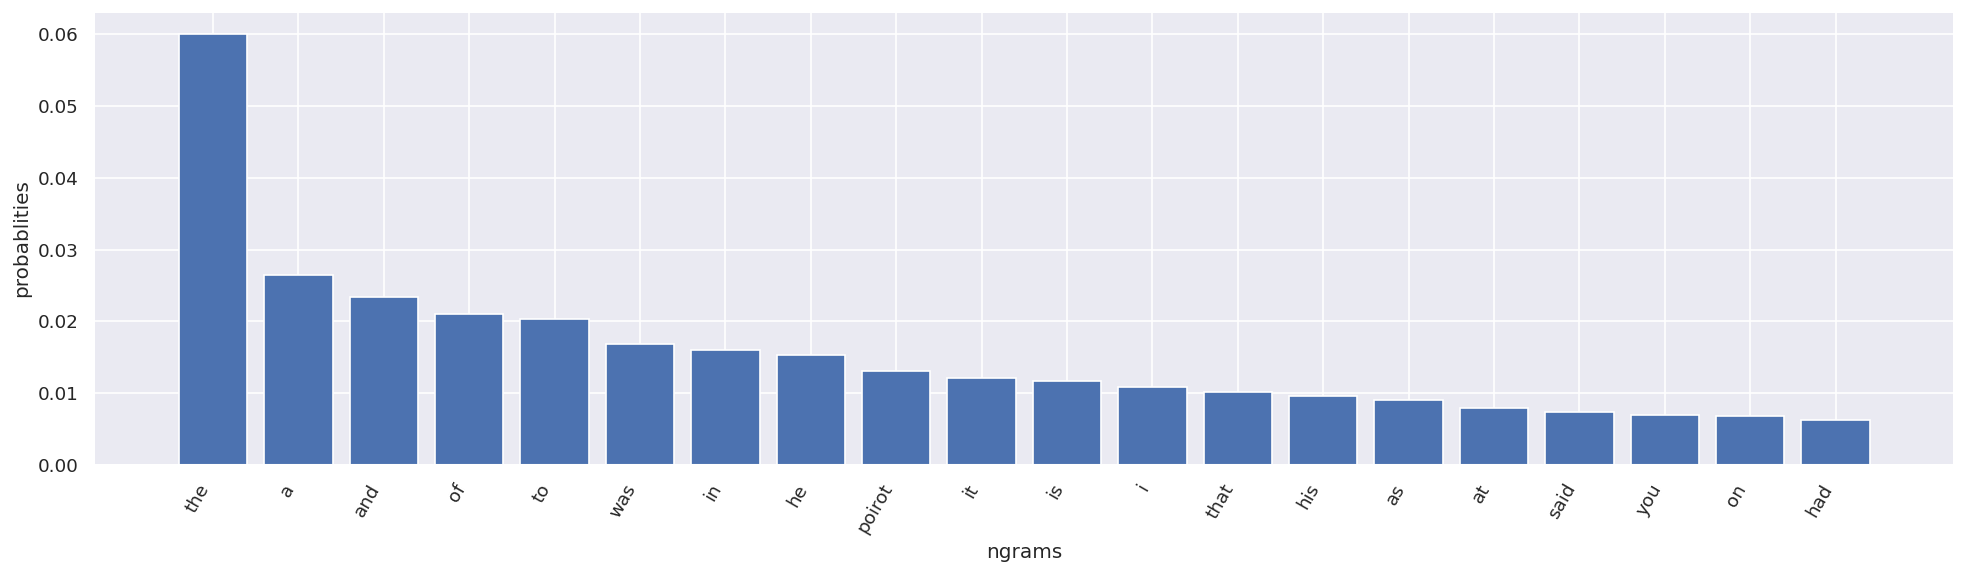

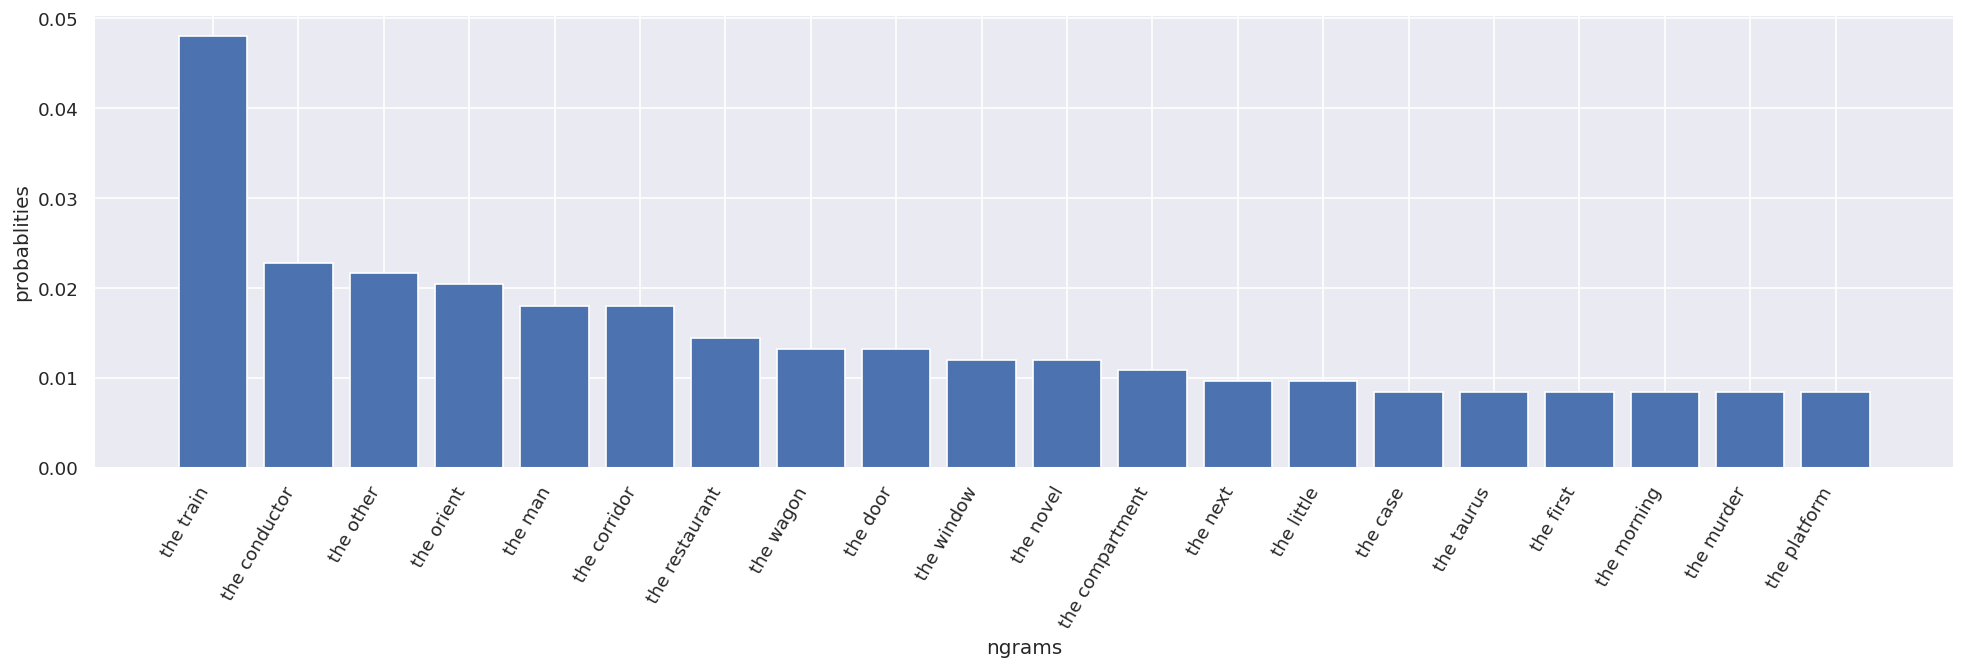

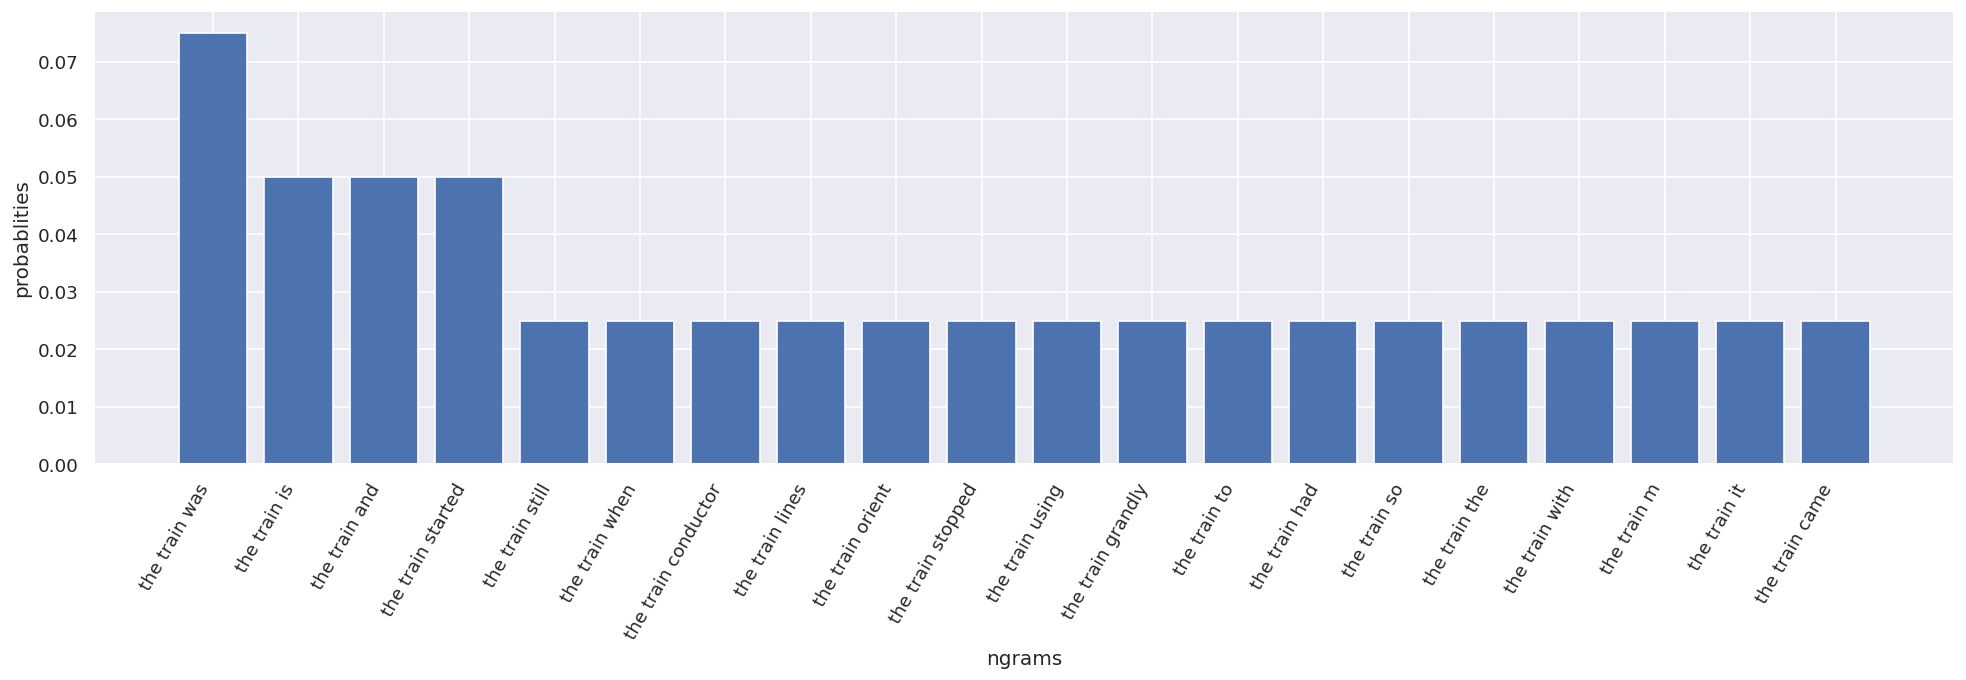

In [1]:
from importlib import reload
import exercise_2
exercise_2 = reload(exercise_2)

file = open("data/orient_express.txt", "r")
# file = open("test.txt", "r")
text = file.read()

# Preprocess text
tokens = exercise_2.preprocess(text)

# Find conditional probabilities of unigrams, bigrams, trigrams
"""
Modify your function call based on how you have defined find_ngram_probs 
in exercise_2.py
"""
unigrams = exercise_2.find_ngram_probs(tokens, model='unigram')
bigrams = exercise_2.find_ngram_probs(tokens, model='bigram')
trigrams = exercise_2.find_ngram_probs(tokens, model='trigram')

# Plot most frequent ngrams
"""
Modify the function signature as per your definition of plot_most_frequent 
in exercise_2.py
"""
most_frequent = exercise_2.plot_most_frequent(unigrams)
most_frequent = exercise_2.plot_most_frequent(bigrams, most_frequent)
most_frequent = exercise_2.plot_most_frequent(trigrams, most_frequent)

## Exercise 3 (4 points)

### 3.1 

Read the corpus file again and apply the preprocessing steps from Exercise 2. Split the corpus into a train and test sections; the size of the test section should be 10% of the corpus. Do this by implementing the `train_test_split` function in `exercise_3.py`.  Then, train 3-, 2- and 1-gram language models with your implementation from Exercise 2 on the train section. You may change the parameters of the functions if you find it necessary, but the code should still be written in the .py file. (1 point)

In [2]:
from pathlib import Path
from importlib import reload
import exercise_3, exercise_2
exercise_3 = reload(exercise_3)
exercise_2 = reload(exercise_2)   

file = Path("data/orient_express.txt").open('r')
text = file.read()

# TODO: apply tokenizer from exercise 2
tokenized = exercise_2.preprocess(text)

# TODO: split the corpus into a train corpus and a test corpus, with test_size=10%
train, test = exercise_3.train_test_split(tokenized, 0.1)

# TODO: train unigram, bigram, trigram LM using the method defined in exercise_2
# call each method as per your function definition

unigram_lm = exercise_2.find_ngram_probs(train, model='unigram')
bigram_lm = exercise_2.find_ngram_probs(train, model='bigram')
trigram_lm = exercise_2.find_ngram_probs(train, model='trigram')

### 3.2

Calculate relative frequencies for all three test corpora. Do this by implementing the function `relative_frequencies` in `exercise_3.py`. <br/>
Relative frequency is calculated as follows: <br/>
e. g. for bigrams, $ f(w_{i-1}, w_i) = \frac{N(w_{i-1}, w_i)}{N(\bullet,\bullet)}$, where $N( w_{i-1},w_i)$ is the count of the bigram and $N(\bullet,\bullet)$ is the total number of bigrams in the corpus. For consistency, you should include a bigram $(w_N, w_1)$, where $N$ is the length of the corpus (and likewise for trigrams) as you have done in 2.2. (0.5 points)

In [3]:
# TODO: calculate unigram, bigram, trigram relative frequencies
unigram_rfs = exercise_3.relative_frequencies(test)
bigram_rfs = exercise_3.relative_frequencies(test, model='bigram')
trigram_rfs = exercise_3.relative_frequencies(test, model='trigram')

### 3.3

Implement the perplexity calculation for all 3 language models in the function `pp`, and perform the calculation on the test section of the corpus. You should use the perplexity formula from slide 21, chapter 3:
\begin{equation}
  PP = 2^{-\sum_{w,h}f(w,h)\log_2 P(w|h)}
\end{equation}

* Can you simply apply the formula to the language model and the relative frequencies? What would happen if an ngram from the test set is absent in the train set?

* Why is it possible to calculate perplexity with this formula? How does it differ from the formula in exercise 1 of this sheet? 

(1.5 points)

**Answer** <br>
- No. We must remove the token from the test set that are absent in the train set. We compute perplexity for only those tokens in the test set which have already been encountered while training the language model. Since perplexity involves computation of $\log(\text{cond_prob})$, ngram that is absent in the train set would result in $-\infty$, and the final perplexity value will be equal to $\infty$ because ($2^{-(-\infty)}$).

- This equation is an alternative formulation of same formula in exercise 1 (in base of 2). The term $f(w,h)$ is the relative frequency of sequence $(h,w)$ which is analogous to absolute frequency of sequence $(h,w)$ divided by the vocabulary size. The equation given in exercise 1 is valid only for bigrams. While the given equation here is valid for ngrams.



In [4]:
# "Smoothing"
unigram_rfs = {unigram:rf for unigram, rf in unigram_rfs.items() if unigram in unigram_lm}
bigram_rfs = {bigram:rf for bigram, rf in bigram_rfs.items() if bigram in bigram_lm}
trigram_rfs = {trigram:rf for trigram, rf in trigram_rfs.items() if trigram in trigram_lm}

# TODO: compute perplexity for each LM
unigram_pp = exercise_3.pp(unigram_lm, unigram_rfs)
bigram_pp = exercise_3.pp(bigram_lm, bigram_rfs)
trigram_pp = exercise_3.pp(trigram_lm, trigram_rfs)

### 3.4 

Plot perplexity scores for all 3 language models. Do so by implementing the `plot_pps` function.
* Explain the differences between the language models. 
* Is it always a good idea to increase the history for n-gram based language models? What can happen if n is too large? (1 point)

**Answer** <br>
- The three lanuguage models differ on the basis of ngram size. A trigram language model is better than the bigram and unigram language model becuase it is easier to predict the next word given the last two words. For similar reasons, a bigram language model is better than unigram language model. The same can be concluded from the language model vs perplexity graph. 
- It is a good idea to increase the history of a n-gram based LM, but to a certain extent. Naturally, the model would give better prediction given some history, but this comes at a cost of high memory consumption and computation power as we are dragging some history to make every prediction. If $n$  is too large, it would be practically infeasible to train a language model on a larger corpus. As this would subsequently require larger memory storage (RAM) and too-long training and inference time.

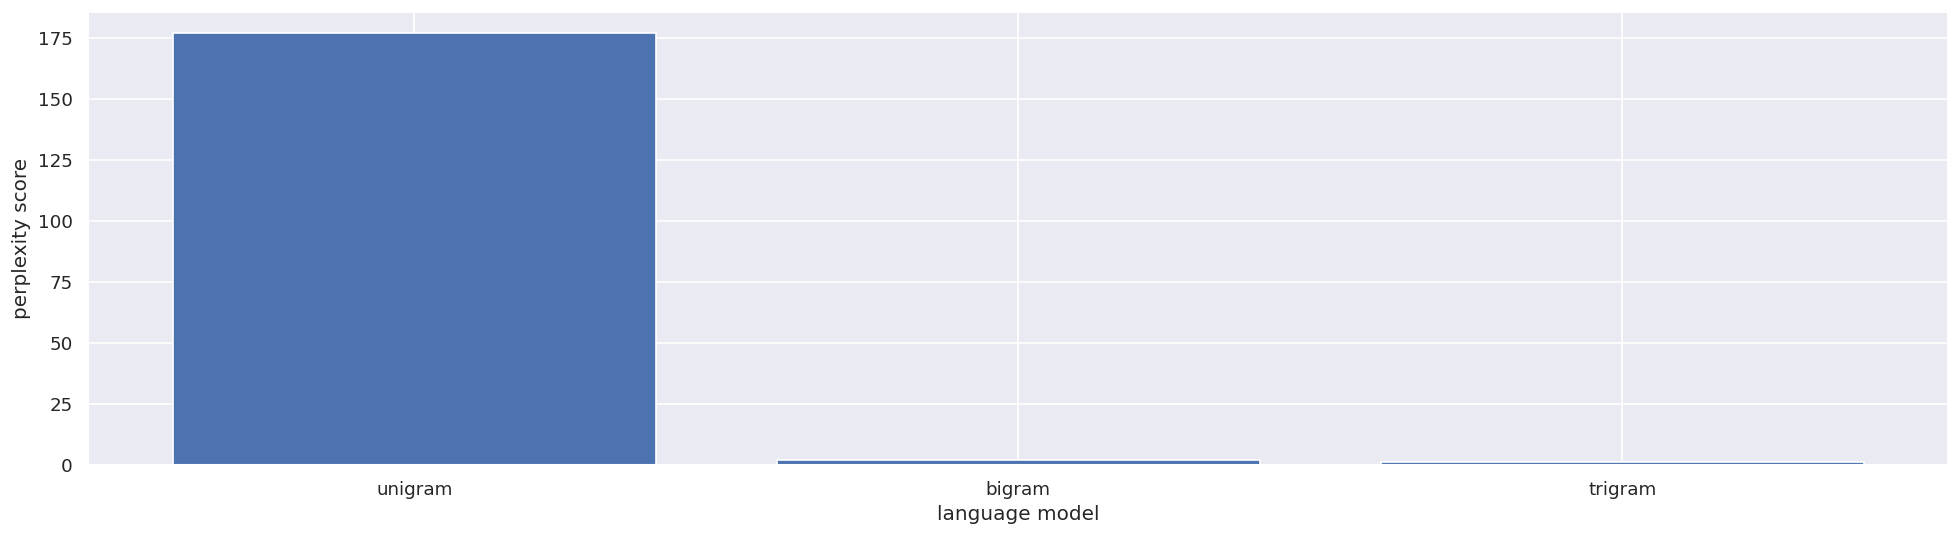

In [5]:
# TODO: plot
pps = [unigram_pp, bigram_pp, trigram_pp]
exercise_3.plot_pps(pps)

## Bonus (1.5 points)

Revisit exercise 1.

1. Come up with another metric (not language model) as an alternative to perplexity that could measure language model capabilities.
2. What are the advantages and disadvantages of such a metric in comparison to perplexity?
3. Compute your metric with respect to the four sentences (in exercise 1) and the provided language model.